In [1]:
%%time
import malaya

CPU times: user 5.88 s, sys: 1.7 s, total: 7.57 s
Wall time: 13.5 s


## Explanation

Positive subjectivity: based on or influenced by personal feelings, tastes, or opinions. Can be a positive or negative sentiment.

Negative subjectivity: based on a report or a fact. Can be a positive or negative sentiment.

In [2]:
negative_text = 'Kerajaan negeri Kelantan mempersoalkan motif kenyataan Menteri Kewangan Lim Guan Eng yang hanya menyebut Kelantan penerima terbesar bantuan kewangan dari Kerajaan Persekutuan. Sedangkan menurut Timbalan Menteri Besarnya, Datuk Mohd Amar Nik Abdullah, negeri lain yang lebih maju dari Kelantan turut mendapat pembiayaan dan pinjaman.'
positive_text = 'kerajaan sebenarnya sangat bencikan rakyatnya, minyak naik dan segalanya'

All models got `get_proba` parameters.
If True, it will returned probability every classes. Else, it will return highest probability class. **Default is False.**

## Load multinomial model

In [8]:
model = malaya.subjective.multinomial()
print(model.predict(positive_text,get_proba=True))
print(model.predict(negative_text,get_proba=True))
model.predict_batch([negative_text,negative_text],get_proba=True)

{'negative': 0.009240767162200498, 'positive': 0.0759232837799535, 'neutral': 0.914835949057846}
{'negative': 0.7214589553228845, 'positive': 0.0027854104467711456, 'neutral': 0.2757556342303443}


[{'negative': 0.7214589553228845,
  'positive': 0.0027854104467711456,
  'neutral': 0.2757556342303443},
 {'negative': 0.7214589553228845,
  'positive': 0.0027854104467711456,
  'neutral': 0.2757556342303443}]

## Load xgb model

In [9]:
model = malaya.subjective.xgb()
print(model.predict(positive_text,get_proba=True))
print(model.predict(negative_text,get_proba=True))
model.predict_batch([negative_text,negative_text],get_proba=True)

{'negative': 0.0085689435, 'positive': 0.14310563, 'neutral': 0.84832543}
{'negative': 0.84999824, 'positive': 0.0015000176, 'neutral': 0.14850175}


[{'negative': 0.84999824, 'positive': 0.0015000176, 'neutral': 0.14850175},
 {'negative': 0.84999824, 'positive': 0.0015000176, 'neutral': 0.14850175}]

## BERT model

BERT is the best subjectivity model in term of accuracy, you can check subjectivity accuracy here, https://malaya.readthedocs.io/en/latest/Accuracy.html#subjectivity-analysis. Question is, why BERT?

1. Transformer model learn the context of a word based on all of its surroundings (live string), bidirectionally. So it much better understand left and right hand side relationships.
2. Because of transformer able to leverage to context during live string, we dont need to capture available words in this world, instead capture substrings and build the attention after that. BERT will never have Out-Of-Vocab problem.

## List available BERT models

In [10]:
malaya.subjective.available_bert_model()

['multilanguage', 'base', 'small']

## Load BERT models

In [11]:
model = malaya.subjective.bert(model = 'base')

  0%|          | 0.00/447 [00:00<?, ?MB/s]

downloading frozen /Users/huseinzol/Malaya/subjective/base model


447MB [01:18, 6.44MB/s]                          
W0807 18:18:17.930747 4529976768 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_utils/_utils.py:45: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

W0807 18:18:17.931871 4529976768 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_utils/_utils.py:46: The name tf.GraphDef is deprecated. Please use tf.compat.v1.GraphDef instead.

W0807 18:18:24.135951 4529976768 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_utils/_utils.py:41: The name tf.InteractiveSession is deprecated. Please use tf.compat.v1.InteractiveSession instead.



#### Predict single string

In [12]:
model.predict(positive_text,get_proba=True)

{'negative': 1.0, 'positive': 1.1824093e-10, 'neutral': 0.0}

#### Predict batch of strings

In [13]:
model.predict_batch([negative_text, positive_text],get_proba=True)

[{'negative': 0.99999976, 'positive': 1.3250168e-09, 'neutral': 2.3841858e-07},
 {'negative': 1.0, 'positive': 3.137356e-10, 'neutral': 0.0}]

#### Open subjectivity visualization dashboard

Default when you call `predict_words` it will open a browser with visualization dashboard, you can disable by `visualization=False`.

In [ ]:
model.predict_words(negative_text)

In [14]:
model.predict_words(negative_text)

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [07/Aug/2019 18:19:41] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2019 18:19:41] "GET /static/admin-materialize.min.css HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2019 18:19:41] "GET /static/echarts.min.js HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2019 18:19:42] "GET /favicon.ico HTTP/1.1" 200 -
----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 52695)
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/socketserver.py", line 361, in finish_request
    self.Re


stopping Server...


## List available deep learning models

In [5]:
malaya.subjective.available_deep_model()

['self-attention', 'bahdanau', 'luong']

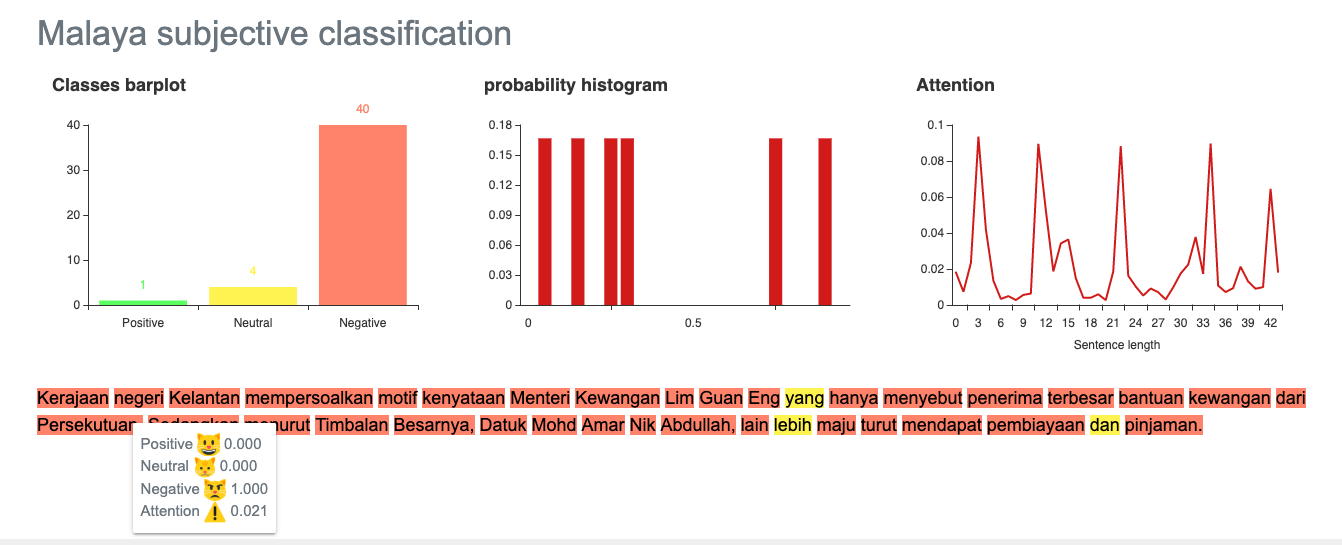

In [15]:
from IPython.core.display import Image, display

display(Image('bert-subjective.png', width=800))

## Load deep learning models

Good thing about deep learning models from Malaya, it returns `Attention` result, means, which part of words give the high impact to the results. But to get `Attention`, you need to set `get_proba=True`.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load bahdanau model

In [18]:
model = malaya.subjective.deep_model('bahdanau')

#### Predict single string

In [19]:
model.predict(positive_text)

'neutral'

In [20]:
result = model.predict(positive_text,get_proba=True,add_neutral=False)
result

{'negative': 0.42468444,
 'positive': 0.57531554,
 'attention': {'kerajaan': 0.02448606,
  'sebenarnya': 0.054138947,
  'sangat': 0.7235162,
  'bencikan': 0.075951874,
  'rakyatnya': 0.027106065,
  ',': 0.0,
  'minyak': 0.049579866,
  'naik': 0.02358539,
  'dan': 0.0,
  'segalanya': 0.021635499}}

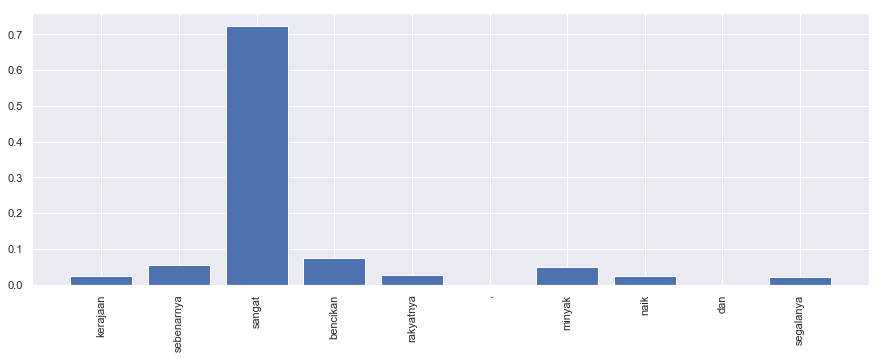

In [21]:
plt.figure(figsize = (15, 5))
keys = result['attention'].keys()
values = result['attention'].values()
aranged = [i for i in range(len(keys))]
plt.bar(aranged, values)
plt.xticks(aranged, keys, rotation = 'vertical')
plt.show()

#### Open subjectivity visualization dashboard

Default when you call `predict_words` it will open a browser with visualization dashboard, you can disable by `visualization=False`.

In [ ]:
model.predict_words(negative_text)

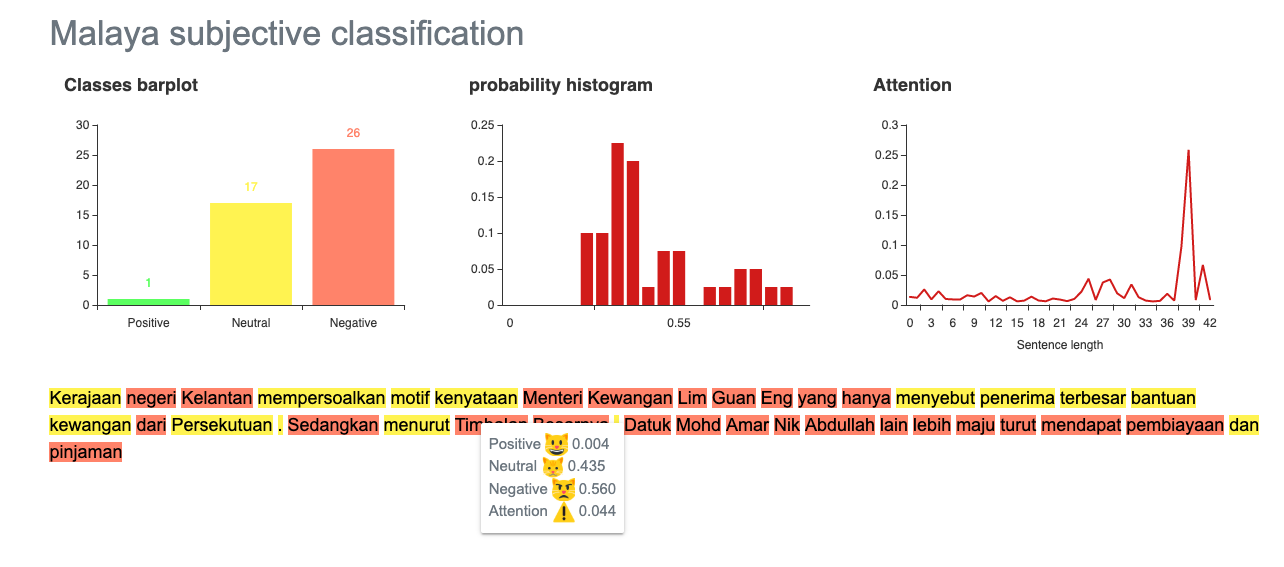

In [13]:
from IPython.core.display import Image, display

display(Image('subjective-bahdanau.png', width=800))

#### Predict batch of strings

In [22]:
model.predict_batch([negative_text, positive_text],get_proba=True)

[{'negative': 0.6787287, 'positive': 0.0032127132, 'neutral': 0.3180586},
 {'negative': 0.0017332617, 'positive': 0.82667387, 'neutral': 0.17159289}]

**You might want to try `luong` and `self-attention` by yourself.**

## Stacking models

More information, you can read at [https://malaya.readthedocs.io/en/latest/Stack.html](https://malaya.readthedocs.io/en/latest/Stack.html)

In [23]:
multinomial = malaya.subjective.multinomial()
xgb = malaya.subjective.xgb()
bahdanau = malaya.subjective.deep_model('bahdanau')

In [24]:
malaya.stack.predict_stack([multinomial, xgb, bahdanau], positive_text)

[{'negative': 0.008404338614474443,
  'positive': 0.1395863910599889,
  'neutral': 0.8320294754572061}]